# Case Study 1
## Marketing Campaign KPIs

Data source :

https://archive.ics.uci.edu/ml/datasets/bank+marketing


The data we will explore is from a Portuguese Bank. The bank conducted a marketing campaign to get its clients to subscribe to a bank term deposit ([more info here](https://www.canstar.com.au/term-deposits/what-is-a-term-deposit/)). It conducted this marketing using phone calls - sometimes using multiple calls to the same clients. The bank has a lot of information on its existing clients, and it has collated this with the results of the marketing campaign. We are going to explore this data.

In [16]:
%load_ext autoreload
%autoreload 2

import helpers as hp

import pandas as pd
import numpy as np
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
df['conversion'] = hp.binary_process(df, 'y')
df2 = df.copy()
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Segmentation Analysis
### Segment by Age

In [20]:
hp.ratio_segmented_1(df2, 'conversion', 'age').head()

age
17    0.400000
18    0.428571
19    0.476190
20    0.353846
21    0.284314
Name: conversion, dtype: float64

We will first try to segment by age without grouping into age bins and we will see the pitfalls of that. The Figure below shows the conversion rate for each age in the dataset. The conversion rates look most consistent in the ages with the most data points, say more than 500.

Notice that in the age values where the number of data points is small (less than a few hundred), the conversion rate is rather erratic and jumps up and down. You can imagine that in these bins, a difference in one or two conversions will make a huge difference in the ratio.

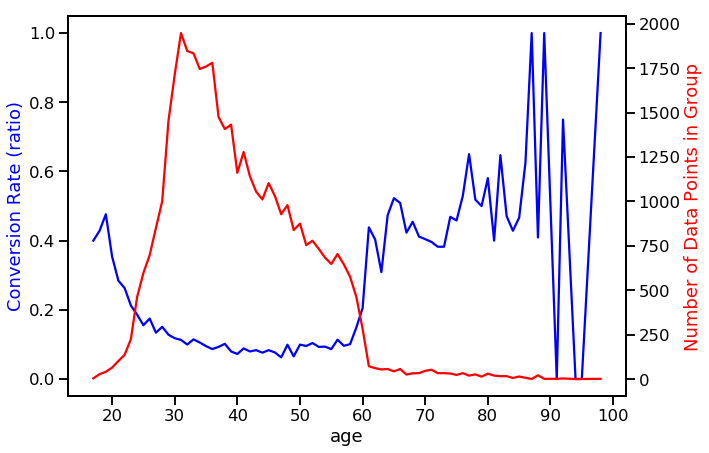

In [21]:
fig, ax = hp.plot_ratios_and_bins(df2, 'conversion', 'age')

These erratic results (noisy data) are not good for deriving actionable insights since, well, all it is telling us is that there is not enough data in these age values. If the bank just targeted more seniors, for example, we would have more reliable data for the senior age range. But we don't live in a perfect world so we have to find another way to make use of this. One way is to group the ages into age ranges like 50-60, 60-70, etc. By binning or aggregating the data this way, we can "damp out the noise" and find some insights if they are there. In other words, we are changing the resolution of age bins from 1 year to 10 years (or whatever window we choose).

In [22]:
df2['age group'] = pd.cut(df2['age'],
                          [18, 30, 40, 50,
                           60, 70, 100],
                         right=False,
                         precision=2).astype(str)
df2 = df2[df2['age group'] != 'nan']

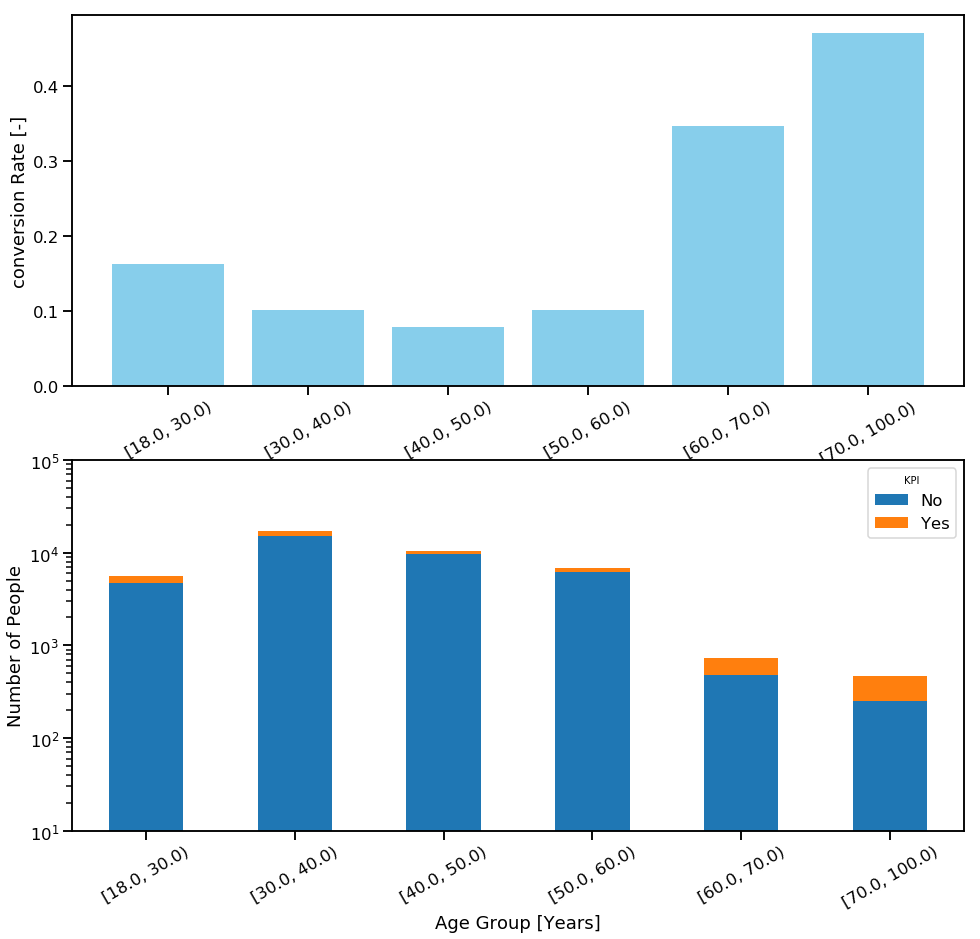

In [23]:
fig2, ax2 = hp.bar_ratios_and_bins(df2, 'conversion',
                                         'age group')

_ = ax2[1].set_xlabel('Age Group [Years]')
ax2[1].set_yscale('log')
_ = ax2[1].set_ylim([10, 100000])
_ = ax2[1].set_ylabel('Number of People')

The bar plots above do a better job of showing how the conversion rate varies with age by binning the results into age groups. Furthermore, we have plotted the number of people in each age group (on a log scale to fit multiple orders of magnitude) and have shown that every age group has at least a few hundred people in it - however, we have to make a judgment call as to whether a few hundred is a reliable sample. For this project, we're going to assume that this is adequate.

## Segmentation Along Two Dimensions
Let's segment this population along age group and marital status, and look at the resulting conversion rates.

In [24]:
hp.ratio_segmented_2(df2, 'conversion', ['age group', 'marital'])

marital,divorced,married,single,unknown
age group,,,,
"[18.0, 30.0)",0.002119,0.027895,0.132239,0.000177
"[30.0, 40.0)",0.007557,0.052958,0.040383,0.000354
"[40.0, 50.0)",0.011970,0.054627,0.012350,0.000285
"[50.0, 60.0)",0.017342,0.077674,0.006412,0.000146
"[60.0, 70.0)",0.037293,0.301105,0.006906,0.001381
"[70.0, 100.0)",0.136461,0.321962,0.012793,0.000000


Now we have broken the population down into age groups and marital status groups. If you add up the columns in each row, you will get the same numbers as those in the first bar chart. Therefore, each number represents the contribution of each marital status to the conversion rate of each age group. This will make more sense with a stacked bar chart, shown below.

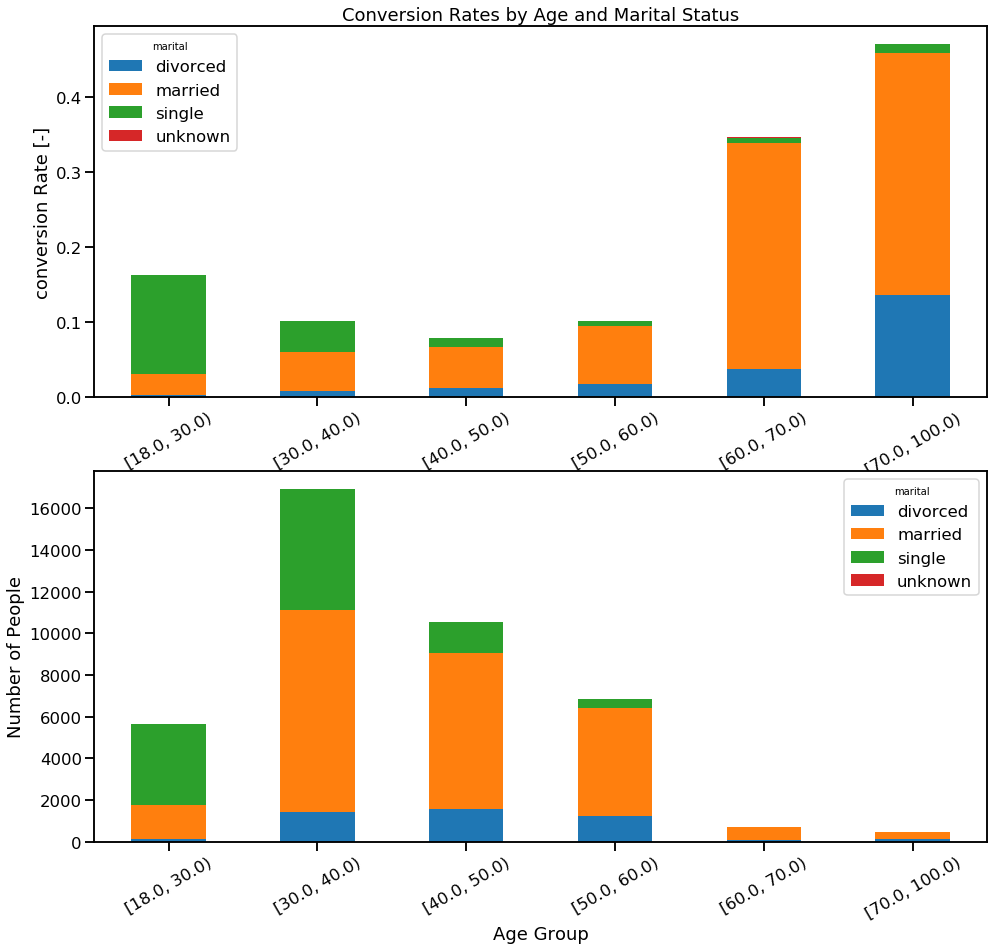

In [25]:
fig3, ax3 = hp.stacked_bar_ratios(df2, 'conversion', ['age group', 'marital'])
ax3[1].set_xlabel('Age Group')
ax3[1].set_ylabel('Number of People')
_ = ax3[0].set_title('Conversion Rates by Age and Marital Status')

One notable insight in the stacked bar chart is that married people contribute at big chunk of the conversions in all segments except for the 18-30 age group. It is hard to definitively say what is going on here - at first glance on the top stacked bar, it appears that the bank is very good at turning married people into customers.

However, this data is NOT normalized by the sub-populations of each martial status within each age group. Therefore, it does NOT follow that a married person is more likely to respond than a single person. Taking a closer look at the bottom stacked bar chart reveals that older people in our client list are more likely to be married or divorced than single. That alone could explain the different contributions to the conversion rate in each age group.